In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

$ x' = x(α_1 - β_1 y) $

$ y' = y(-α_2 + β_2 x) $

In [38]:
START = 0
END = 80
N = 10000
h = (END-START) / N

alpha1 = 1.
alpha2 = 0.5
beta1 = 0.1
beta2 = 0.02

X0 = 20.
Y0 = 20.

## Metoda jawna Eulera

In [39]:
explicit_x = np.empty(N, dtype=np.double)
explicit_y = np.empty(N, dtype=np.double)
explicit_x[0] = X0
explicit_y[0] = Y0

def fx(x, y):
    return x * (alpha1 - beta1 * y)

def fy(x, y):
    return y * (-alpha2 + beta2 * x)

# euler explicit
for i in range(1, N):
    explicit_x[i] = explicit_x[i-1] + h * fx(explicit_x[i-1], explicit_y[i-1])
    explicit_y[i] = explicit_y[i-1] + h * fy(explicit_x[i-1], explicit_y[i-1])

## Metoda niejawna Eulera

In [40]:
implicit_x = np.empty(N, dtype=np.double)
implicit_y = np.empty(N, dtype=np.double)
implicit_x[0] = X0
implicit_y[0] = Y0

def F(variables, x_n, y_n):
    x_next, y_next = variables
    eq1 = x_next - x_n - h * x_next * (alpha1 - beta1 * y_next)
    eq2 = y_next - y_n - h * y_next * (-alpha2 + beta2 * x_next)
    return [eq1, eq2]

# Euler implicit solved using Newton - Raphson method
for i in range(1, N):
    x_n, y_n = implicit_x[i-1], implicit_y[i-1]
    sol = root(F, [x_n, y_n], args=(x_n, y_n), method='hybr')  # or method='lm'
    x_next, y_next = sol.x
    implicit_x[i] = x_next
    implicit_y[i] = y_next

## Metoda półjawna Eulera

$ x_{n+1} = x_n + h_n f(x_n, y_{n+1}) $

$ y_{n+1} = y_n + h_n g(x_n, y_{n+1}) $

Przekształcone:

$ y_{n+1} = \frac{y_n}{1 - h(-α_2 + β_2 x_n)} =  \frac{y_n}{1 + h(α_2 - β_2 x_n)} $

$ x_{n+1} = x_n + h_n x_n (α_1 - β_1 y_{n+1})  $

In [41]:
semi_implicit_x = np.empty(N, dtype=np.double)
semi_implicit_y = np.empty(N, dtype=np.double)
semi_implicit_x[0] = X0
semi_implicit_y[0] = Y0

for i in range(1, N):
    x_n, y_n = semi_implicit_x[i-1], semi_implicit_y[i-1]

    semi_implicit_y[i] = y_n / (1 + h * (alpha2 - beta2 * x_n))
    semi_implicit_x[i] = x_n + h * x_n * (alpha1 - beta1 * semi_implicit_y[i])


## Metoda Rungego-Kutty 4 rzędu

In [42]:
RK4_x = np.empty(N)
RK4_y = np.empty(N)
RK4_x[0] = X0
RK4_y[0] = Y0

for i in range(1, N):
    x_n, y_n = RK4_x[i-1], RK4_y[i-1]

    xk1 = x_n * (alpha1 - beta1 * y_n)
    xk2 = (x_n + h*xk1/2) * (alpha1 - beta1 * (y_n + h*xk1/2))
    xk3 = (x_n + h*xk2/2) * (alpha1 - beta1 * (y_n + h*xk2/2))
    xk4 = (x_n + h*xk3) * (alpha1 - beta1 * (y_n + h*xk3))

    yk1 = y_n * (-alpha2 + beta2 * x_n)
    yk2 = (y_n + h*yk1/2) * (-alpha2 + beta2 * (x_n + h*yk1/2))
    yk3 = (y_n + h*yk2/2) * (-alpha2 + beta2 * (x_n + h*yk2/2))
    yk4 = (y_n + h*yk3) * (-alpha2 + beta2 * (x_n + h*yk3))

    RK4_x[i] = x_n + h/6 * (xk1 + 2*xk2 + 2*xk3 + xk4)
    RK4_y[i] = y_n + h/6 * (yk1 + 2*yk2 + 2*yk3 + yk4)


## Rysowanie

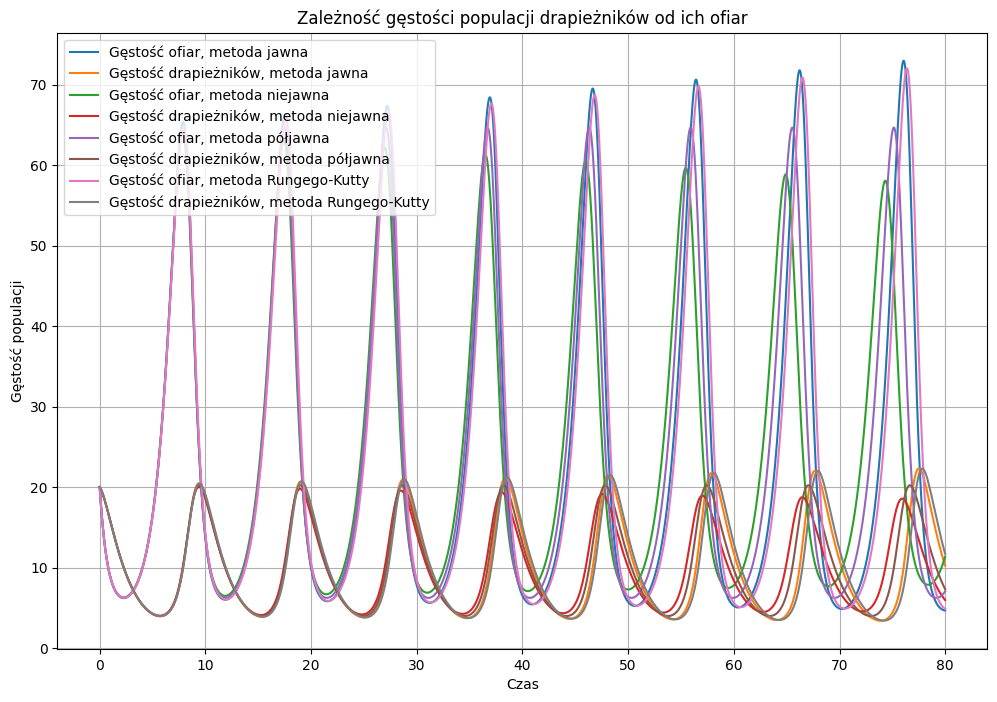

In [43]:
xs = np.arange(START, END, h)
plt.figure(figsize=(12, 8))
plt.plot(xs, explicit_x, label="Gęstość ofiar, metoda jawna")
plt.plot(xs, explicit_y, label="Gęstość drapieżników, metoda jawna")
plt.plot(xs, implicit_x, label="Gęstość ofiar, metoda niejawna")
plt.plot(xs, implicit_y, label="Gęstość drapieżników, metoda niejawna")
plt.plot(xs, semi_implicit_x, label="Gęstość ofiar, metoda półjawna")
plt.plot(xs, semi_implicit_y, label="Gęstość drapieżników, metoda półjawna")
plt.plot(xs, RK4_x, label="Gęstość ofiar, metoda Rungego-Kutty")
plt.plot(xs, RK4_y, label="Gęstość drapieżników, metoda Rungego-Kutty")
plt.legend()
plt.grid()
plt.xlabel("Czas")
plt.ylabel("Gęstość populacji")
plt.title("Zależność gęstości populacji drapieżników od ich ofiar")
plt.show()

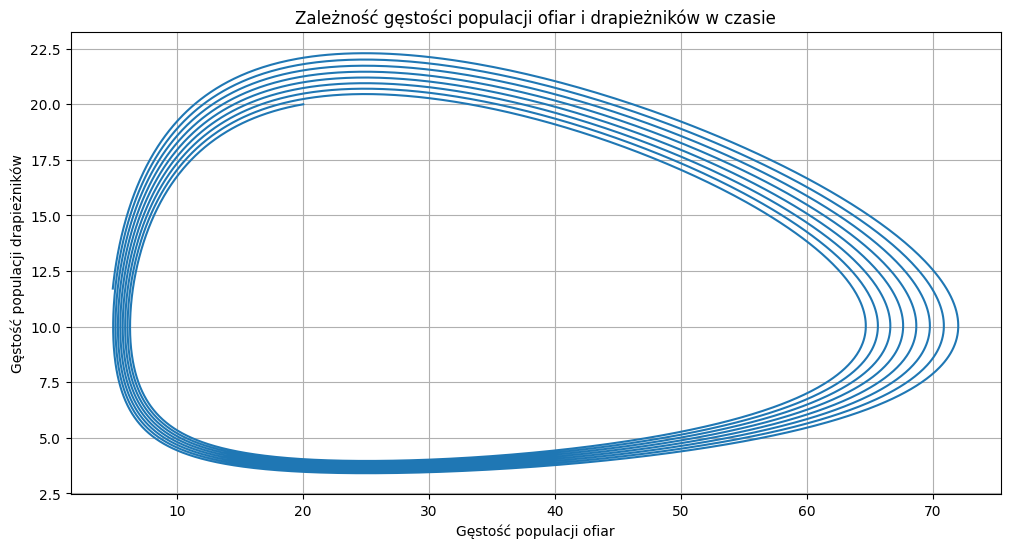

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(RK4_x, RK4_y)
plt.xlabel("Gęstość populacji ofiar")
plt.ylabel("Gęstość populacji drapieżników")
plt.title("Zależność gęstości populacji ofiar i drapieżników w czasie")
plt.grid()
plt.show()

## Niezmiennik

$ H(x, y) = β_2 x + β_1 y - α_2 ln(x) - α_1 ln(y) $

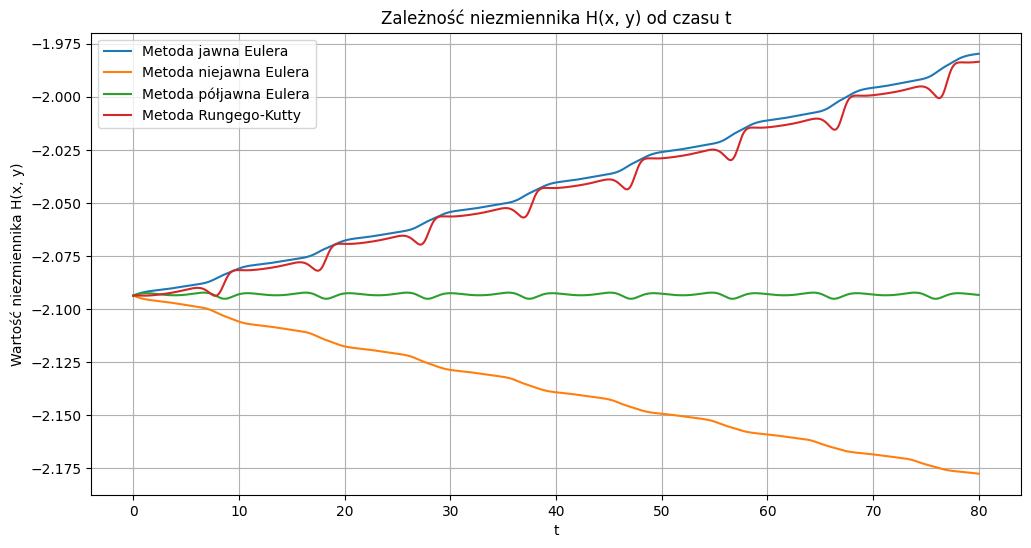

In [48]:
def H(x, y):
    return beta2 * x + beta1 * y - alpha2 * np.log(x) - alpha1 * np.log(y)

plt.figure(figsize=(12, 6))
plt.plot(xs, H(explicit_x, explicit_y), label="Metoda jawna Eulera")
plt.plot(xs, H(implicit_x, implicit_y), label="Metoda niejawna Eulera")
plt.plot(xs, H(semi_implicit_x, semi_implicit_y), label="Metoda półjawna Eulera")
plt.plot(xs, H(RK4_x, RK4_y), label="Metoda Rungego-Kutty")
plt.legend()
plt.xlabel("t")
plt.ylabel("Wartość niezmiennika H(x, y)")
plt.title("Zależność niezmiennika H(x, y) od czasu t")
plt.grid()
plt.show()